## Higher-dimensional intervals

In [1]:
using ValidatedNumerics

A higher-dimensional interval is a Cartesian product of intervals. It is often called an (interval) box.
`ValidatedNumerics.jl` represents this using the `IntervalBox` type:

In [2]:
X = IntervalBox(1..3, 2..4)
Y = IntervalBox(2..4, 3..5)

[2, 4] × [3, 5]

In [4]:
typeof(ans)

ValidatedNumerics.IntervalBox{2,Float64}

In [3]:
X ∩ Y

[2, 3] × [3, 4]

A general set $S$ in $\mathbb{R}^n$ can be approximated using unions of a finite number of `IntervalBox`es $\mathbb{X}$ (called a "subpaving"):

$$\mathbb{X}_- \subseteq S \subseteq \mathbb{X}_+.$$

## Contractors

Often, we have a description of a set $S$, for example as an implicit formula $f(x,y) = 0$, and we wish to find the set that satisfies this **constraint**. 

It turns out that there is a way to **turn a constraint into an explicit algorithm** that can **contract** an interval box $X$, without eliminating any part of $X$ that is contained inside $S$.

As a simple example, consider the set $S := \{(x,y) \in \mathbb{R}^2: x>0, y = x^2$. Given an initial box $X$, we wish to find a function $C$ such that $C(X) \subseteq X$ and $C(X) \cap S = X \cap S$. Furthermore, ideally we wish $C(X)$ to be as small as possible.

In [9]:
function square(X::IntervalBox)
    x, y = X
    
    x = x ∩ (0..∞)
    y = y ∩ x^2
    x = x ∩ √y
    
    return IntervalBox(x, y)
end

square (generic function with 2 methods)

In [10]:
using PyPlot

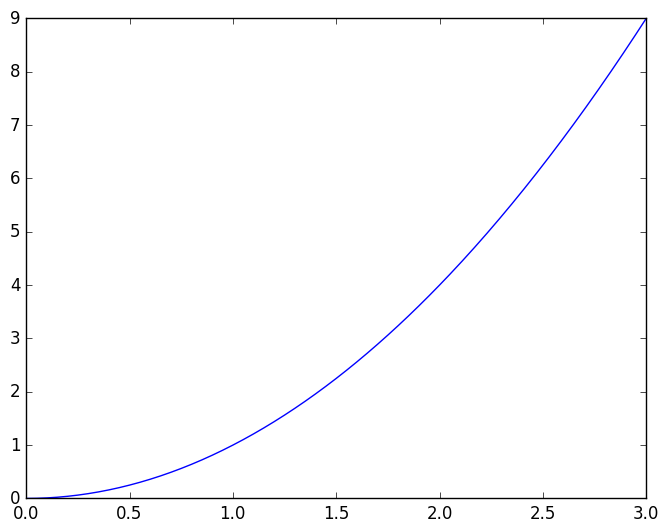

[1.5, 2.5] × [2.25, 6.25]

In [12]:
xx = 0:0.01:3
plot(xx, xx.^2)

X = IntervalBox(1.5..2.5, -3..10)
square(X)

In [16]:
using PyCall
@pyimport matplotlib.patches as patches

function rectangle(xlo, ylo, xhi, yhi; color="grey", alpha=0.5, linewidth=0)
    gca()[:add_patch](patches.Rectangle(
        (xlo, ylo), xhi - xlo, yhi - ylo,
        facecolor=color, alpha=alpha, linewidth=0, edgecolor="none"
    ))
end

function rectangle(X::IntervalBox, color="grey", alpha=0.5, linewidth=0)
    rectangle(X[1].lo, X[2].lo, X[1].hi, X[2].hi, color=color, alpha=alpha, linewidth=linewidth)
end

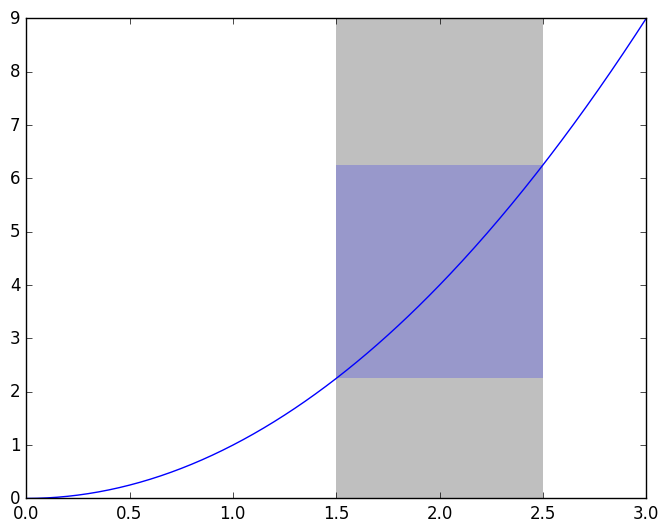

PyObject <matplotlib.patches.Rectangle object at 0x3250c5350>

In [29]:
xx = 0:0.01:3
plot(xx, xx.^2)

X = IntervalBox(1.5..2.5, -3..10)
Y = square(X)

rectangle(X)
rectangle(Y, "blue", 0.2)

In [32]:
function add_one(X::IntervalBox)
    x, y = X
    
    y = y ∩ (x + 1)
    x = x ∩ (y - 1)
    
    return IntervalBox(x, y)
end

add_one (generic function with 1 method)

In [37]:
X

[1.5, 2.5] × [-3, 10]

In [38]:
X = square(X)

[1.5, 2.5] × [2.25, 6.25]

In [39]:
X = add_one(X)

[1.5, 2.5] × [2.5, 3.5]

In [40]:
X = square(X)

[1.58113, 1.87083] × [2.5, 3.5]

In [41]:
X = add_one(X)

[1.58113, 1.87083] × [2.58113, 2.87083]

In [42]:
for i in 1:10
    X = add_one(square(X))
end

In [43]:
X

[1.61803, 1.61804] × [2.61803, 2.61804]

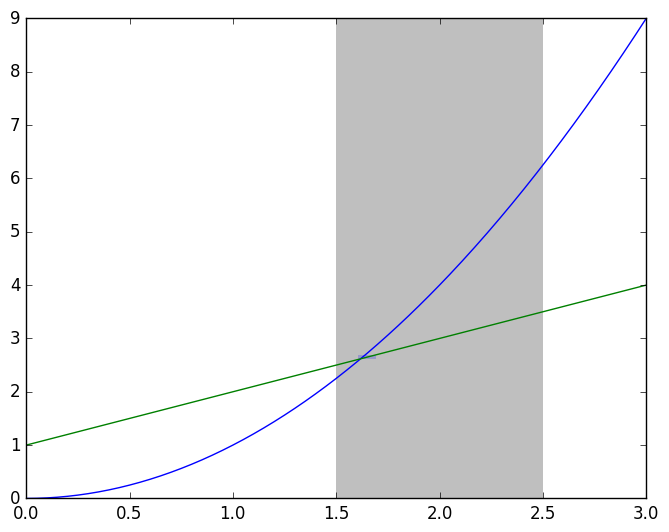

PyObject <matplotlib.patches.Rectangle object at 0x32a672790>

In [46]:
xx = 0:0.01:3
plot(xx, xx.^2)
plot(xx, xx+1)

X = IntervalBox(1.5..2.5, -3..10)

Y = X
for i in 1:3
    Y = add_one(square(Y))
end

rectangle(X)
rectangle(Y, "blue", 0.2)

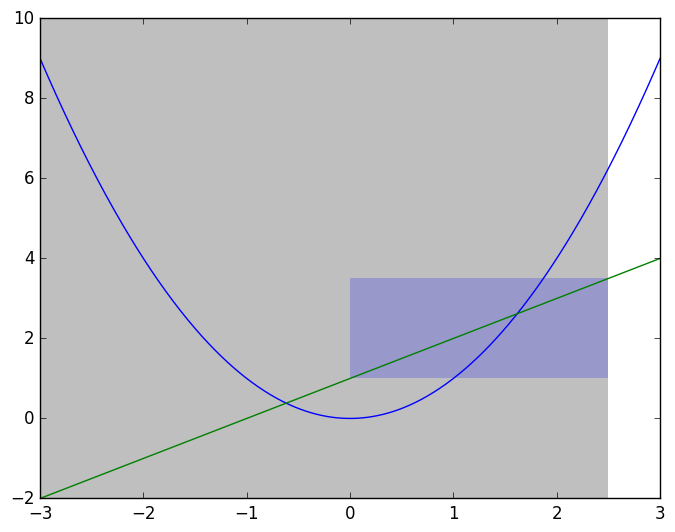

PyObject <matplotlib.patches.Rectangle object at 0x32ad32e50>

In [49]:
xx = -3:0.01:3
plot(xx, xx.^2)
plot(xx, xx+1)

X = IntervalBox(-3..2.5, -3..10)

Y = X
for i in 1:1
    Y = add_one(square(Y))
end

rectangle(X)
rectangle(Y, "blue", 0.2)